In [55]:
import kagglehub
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [56]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
data.shape

(7043, 21)

In [59]:
data.duplicated().sum()

np.int64(0)

In [60]:
data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [61]:
contract_p = pd.pivot_table(data, index='Contract', columns='Churn', aggfunc='size', fill_value=0)
contract_p['Churn_Rate'] = contract_p['Yes'] / (contract_p['Yes'] + contract_p['No'])
contract_p

Churn,No,Yes,Churn_Rate
Contract,,,
Month-to-month,2220,1655,0.427097
One year,1307,166,0.112695
Two year,1647,48,0.028319


In [62]:
payment_p = pd.pivot_table(data, index='PaymentMethod', columns='Churn', aggfunc='size', fill_value=0)
payment_p['Churn_Rate'] = payment_p['Yes'] / (payment_p['Yes'] + payment_p['No'])
payment_p

Churn,No,Yes,Churn_Rate
PaymentMethod,,,
Bank transfer (automatic),1286,258,0.167098
Credit card (automatic),1290,232,0.152431
Electronic check,1294,1071,0.452854
Mailed check,1304,308,0.191067


In [63]:
data['Tenure_Bin'] = pd.cut(data['tenure'], bins=[0, 12, 24, float('inf')], labels=['0-12', '13-24', '25+'])
tenure_p = pd.pivot_table(data, index='Tenure_Bin', columns='Churn', aggfunc='size', fill_value=0)
tenure_p['Churn_Rate'] = tenure_p['Yes'] / (tenure_p['Yes'] + tenure_p['No'])
tenure_p

Churn,No,Yes,Churn_Rate
Tenure_Bin,,,
0-12,1138,1037,0.476782
13-24,730,294,0.287109
25+,3295,538,0.140360


In [64]:
churn_count = data['Churn'].value_counts()
churn_count

,count
Churn,
No,5174
Yes,1869


In [65]:
imbalance = churn_count['Yes'] / churn_count['No']
imbalance

np.float64(0.36122922303826827)

In [66]:
correlation = data['tenure'].corr(data['Churn'].map({'Yes': 1, 'No': 0}))
correlation

np.float64(-0.352228670113078)

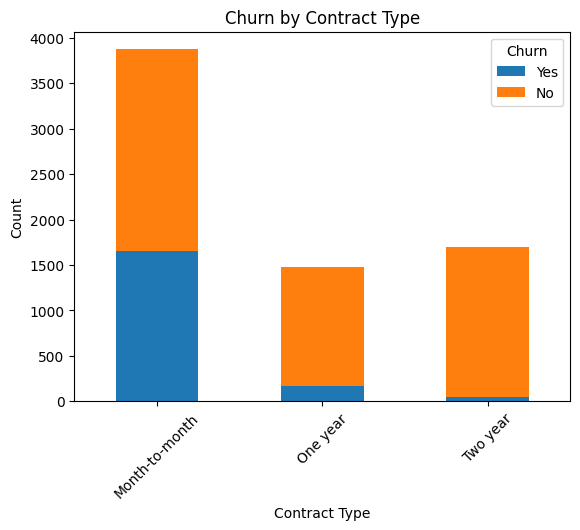

In [67]:
import matplotlib.pyplot as plt
contract_bar = contract_p[['Yes','No']]
contract_bar.plot(kind='bar',stacked=True)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

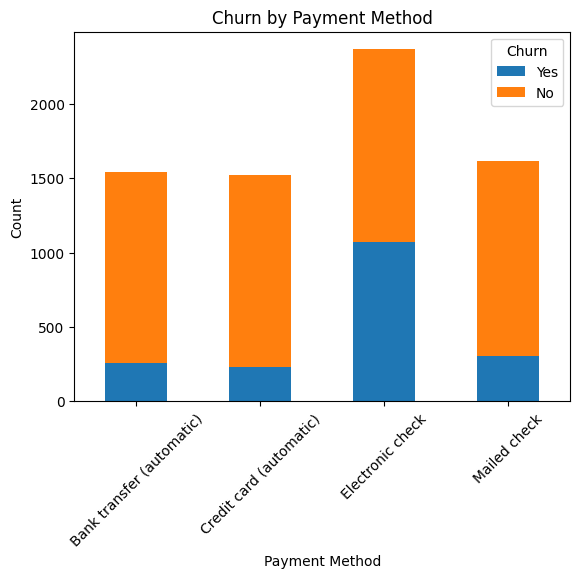

In [68]:
payment_bar = payment_p[['Yes','No']]
payment_bar.plot(kind='bar',stacked=True)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [69]:
data = data.to_csv('telco_customer_churn.csv')